## Decision tree

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.naive_bayes import GaussianNB
import pickle


In [2]:
from sklearn.tree import DecisionTreeClassifier

### Census data

In [3]:
with open('census.pkl', 'rb') as f:
    x_census_training, y_census_training, x_census_test, y_census_test = pickle.load(f)

In [4]:
x_census_training.shape, y_census_training.shape, x_census_test.shape, y_census_test.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [5]:
decision_tree = DecisionTreeClassifier( criterion= "entropy",random_state=0)
decision_tree.fit(x_census_training,y_census_training)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [9]:
prediction = decision_tree.predict(x_census_test)
prediction


array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [10]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_test,prediction)

0.8104401228249745

0.8104401228249745

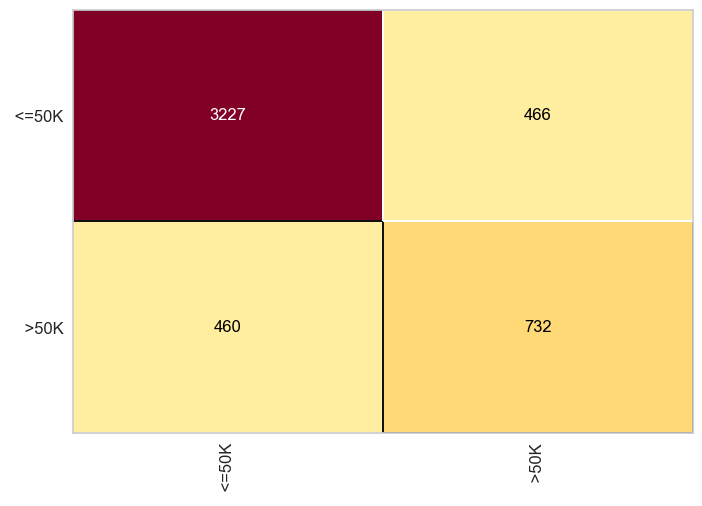

In [11]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix = ConfusionMatrix(decision_tree)
confusion_matrix.fit(x_census_training,y_census_training)
confusion_matrix.score(x_census_test,y_census_test)

In [12]:
print(classification_report(y_census_test,prediction))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885

